# Task 50 - Unsupervised Learning III: PCA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load data
df = pd.read_csv('Iris.csv', header = 0)
print(df.columns)
df.head()


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

In [3]:
# Remove the "Id" column
df = df.drop("Id", axis=1)
print(df.columns)
X = df.iloc[:,[0,1,2,3]]
print(X)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


## Create a plot of the data using all features to show the positive and negative correlations between them.

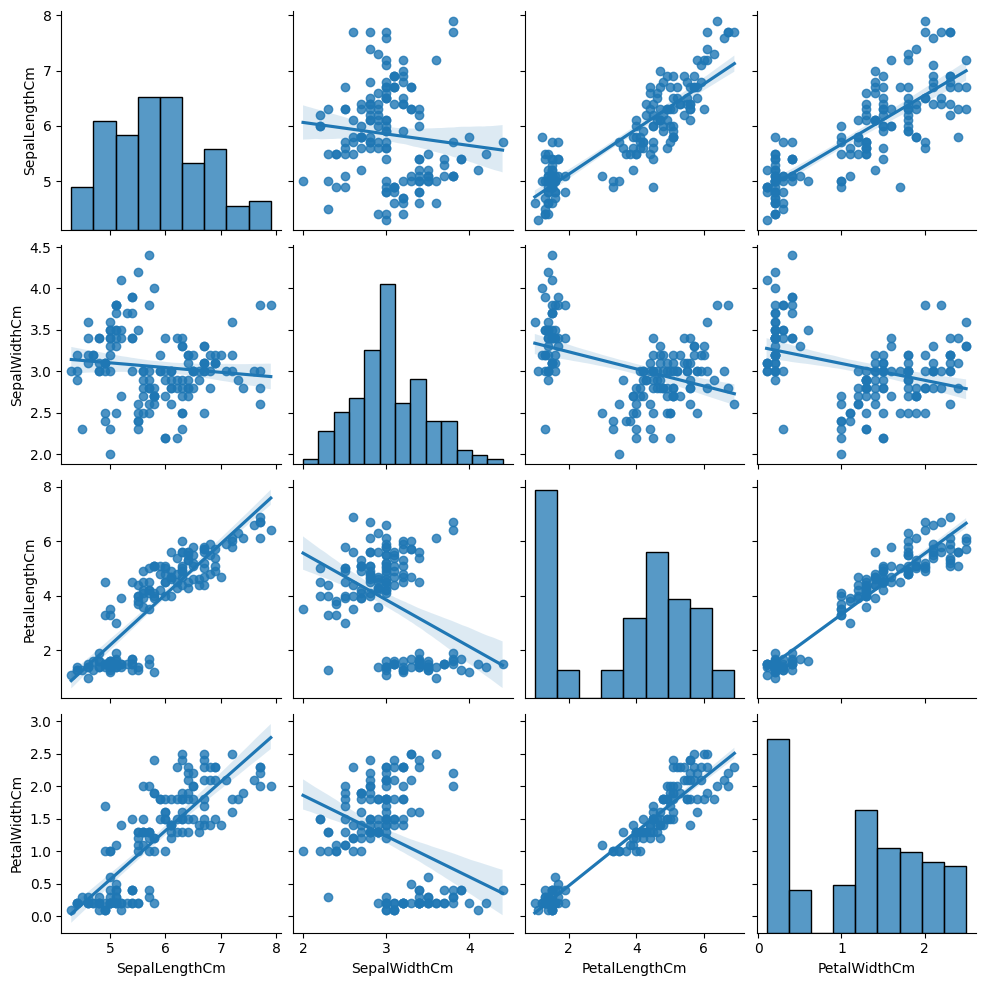

In [4]:
sns.pairplot(X, diag_kind='hist', kind='reg')
plt.show()

# Inspect data

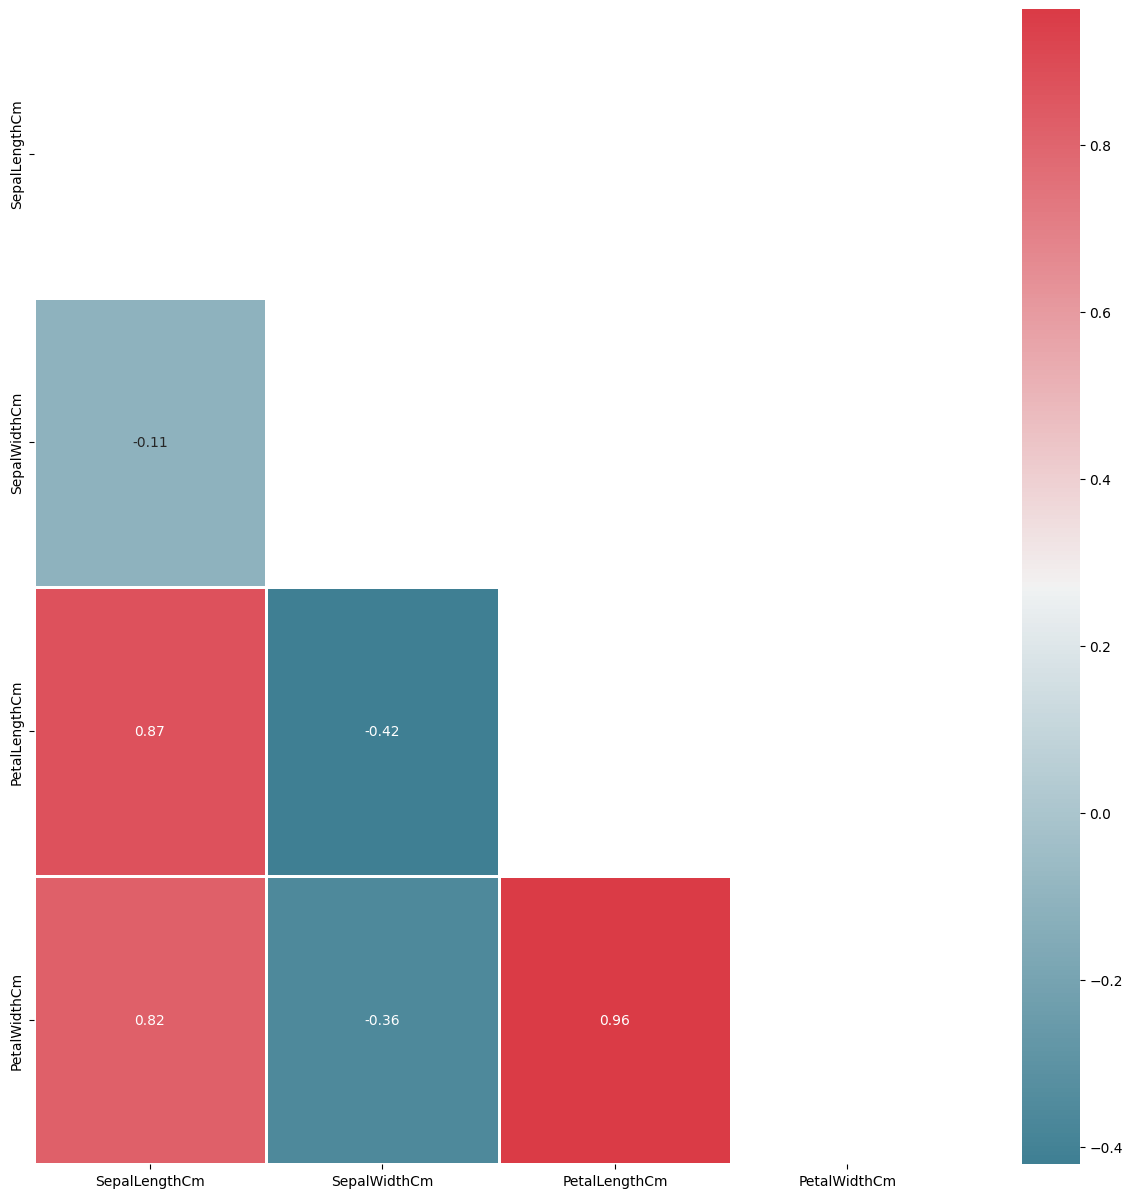

In [5]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(X)

## Apply PCA

In [6]:
# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, :-1])

# Apply PCA
nr_comps = 3
pca = PCA(n_components=nr_comps)
pca_components = pca.fit_transform(scaled_df)

# Save the PCA components to a DataFrame
pca_df = pd.DataFrame(data=pca_components)#, columns=["PC1", "PC2", "PC3"])

pca_df.head()

,0,1,2
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


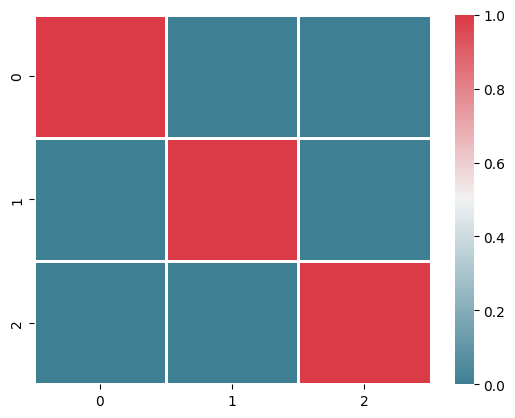

In [7]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

## Interpreting PCA

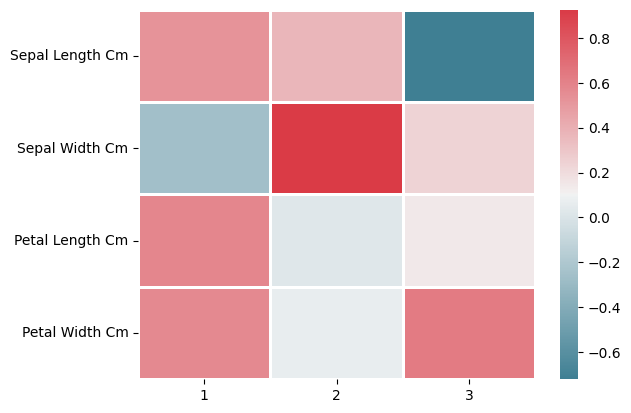

In [9]:
# insert space before uppercase in an array
def insert_space(s):
    new_s = []
    for i in range(len(s)):
        if i > 0 and s[i].isupper() and s[i-1].islower():
            new_s.append(" ")
        new_s.append(s[i])
    return "".join(new_s)

def insert_space_in_array(arr):
    return [insert_space(s) for s in arr]

components = pd.DataFrame(pca.components_, columns=insert_space_in_array(df.columns[0:4]), index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

The removal of redundant information can result in a clearer picture of the underlying structure in the data, which is useful for analysis and modeling purposes.